In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [2]:
sales = pd.read_csv("sales data.csv")

In [3]:
sales['Item_Outlet_Sales'] = pd.to_numeric(sales['Item_Outlet_Sales'])
sales['Item_Visibility'] = pd.to_numeric(sales['Item_Visibility'])

In [4]:
sales = sales.drop(['Item_Weight','Item_Fat_Content','Outlet_Size'], axis=1)

In [5]:
outlet_sales = sales.groupby(['Outlet_Identifier','Outlet_Type','Outlet_Location_Type'])["Item_Outlet_Sales"].agg('sum').round(2)
outlet_sales = outlet_sales.reset_index()
outlet_sales = outlet_sales.drop(['Outlet_Type', 'Outlet_Location_Type'], axis = 1)

In [6]:
sales = sales.rename(columns={'Item_Outlet_Sales': 'Item_Sales'})
outlet_sales.columns = ['Outlet_Identifier', 'Total_Outlet_Sales']

In [7]:
sales = pd.merge(sales, outlet_sales, on='Outlet_Identifier', how='left')

In [8]:
sales['Sales_Ratio'] = (sales['Item_Sales'] / sales['Total_Outlet_Sales'])

In [9]:
#Comparing sales to item visibility. The higher the ratio, the higher the item generates in terms of sales per unit of visibility.
sales['Sales_Ratio_to_Item_Visibility'] = sales['Sales_Ratio'] / sales['Item_Visibility']

In [11]:
#Removing rows with no visibility data.
sales = sales[sales["Item_Visibility"]!=0]
print(sales.head())

  Item_Identifier  Item_Visibility    Item_Type  Item_MRP Outlet_Identifier  \
0           FDA15         0.016047        Dairy  249.8092            OUT049   
1           DRC01         0.019278  Soft Drinks   48.2692            OUT018   
2           FDN15         0.016760         Meat  141.6180            OUT049   
6           FDO10         0.012741  Snack Foods   57.6588            OUT013   
7           FDP10         0.127470  Snack Foods  107.7622            OUT027   

   Outlet_Establishment_Year Outlet_Location_Type        Outlet_Type  \
0                       1999               Tier 1  Supermarket Type1   
1                       2009               Tier 3  Supermarket Type2   
2                       1999               Tier 1  Supermarket Type1   
6                       1987               Tier 3  Supermarket Type1   
7                       1985               Tier 3  Supermarket Type3   

   Item_Sales  Total_Outlet_Sales  Sales_Ratio  Sales_Ratio_to_Item_Visibility  
0   3735.13

Text(0.5,0.98,'Item Visibility against Sales Ratio')

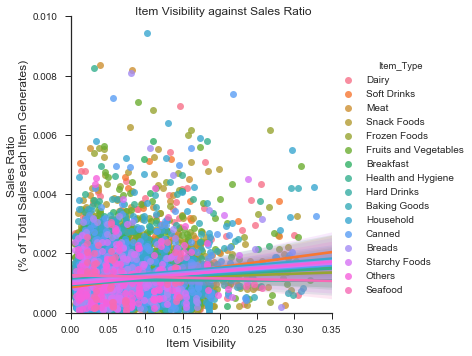

In [650]:
sns.set_style("ticks")
ax = sns.lmplot(x="Item_Visibility", y="Sales_Ratio", data=sales, hue="Item_Type")
plt.xlabel('Item Visibility', fontsize=12)
plt.ylabel('Sales Ratio \n(% of Total Sales each Item Generates)', fontsize=12)
ax.set(xlim=(0, 0.35))
ax.set(ylim=(0, 0.01))
ax.fig.suptitle('Item Visibility against Sales Ratio', fontsize=12)

Text(0.5,0.98,'Item Visibility against Sales Ratio')

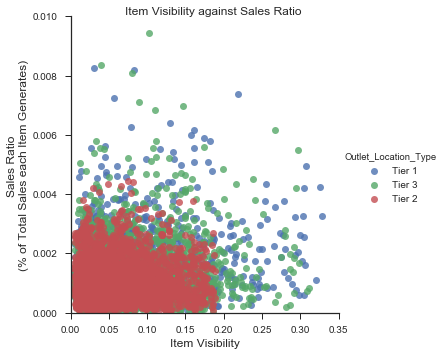

In [651]:
sns.set_style("ticks")
ax = sns.lmplot(x="Item_Visibility", y="Sales_Ratio", data=sales, hue="Outlet_Location_Type",fit_reg=False)
plt.xlabel('Item Visibility', fontsize=12)
plt.ylabel('Sales Ratio \n(% of Total Sales each Item Generates)', fontsize=12)
ax.set(xlim=(0, 0.35))
ax.set(ylim=(0, 0.01))
ax.fig.suptitle('Item Visibility against Sales Ratio', fontsize=12)

Text(0.5,0.98,'Item Visibility against Sales Ratio')

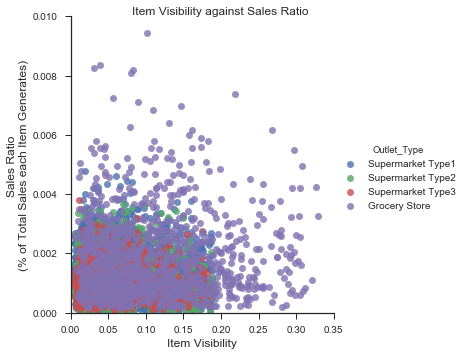

In [652]:
sns.set_style("ticks")
ax = sns.lmplot(x="Item_Visibility", y="Sales_Ratio", data=sales, hue="Outlet_Type",fit_reg=False)
plt.xlabel('Item Visibility', fontsize=12)
plt.ylabel('Sales Ratio \n(% of Total Sales each Item Generates)', fontsize=12)
ax.set(xlim=(0, 0.35))
ax.set(ylim=(0, 0.01))
ax.fig.suptitle('Item Visibility against Sales Ratio', fontsize=12)

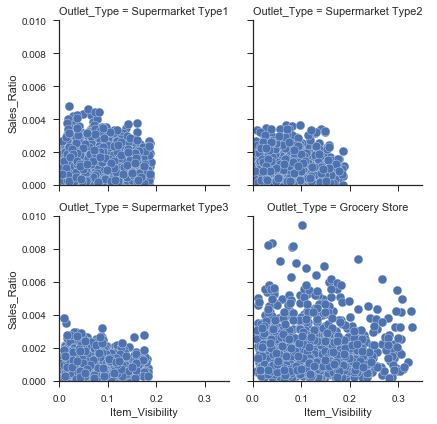

In [653]:
#Analyzing the outlet types
outlettype = dict(s=80, linewidth=.3, edgecolor="w")
g = sns.FacetGrid(sales, col="Outlet_Type", palette="Set1", col_wrap=2)
g = (g.map(plt.scatter, "Item_Visibility", "Sales_Ratio", **outlettype).add_legend())
g.set(xlim=(0, 0.35))
g.set(ylim=(0, 0.01))

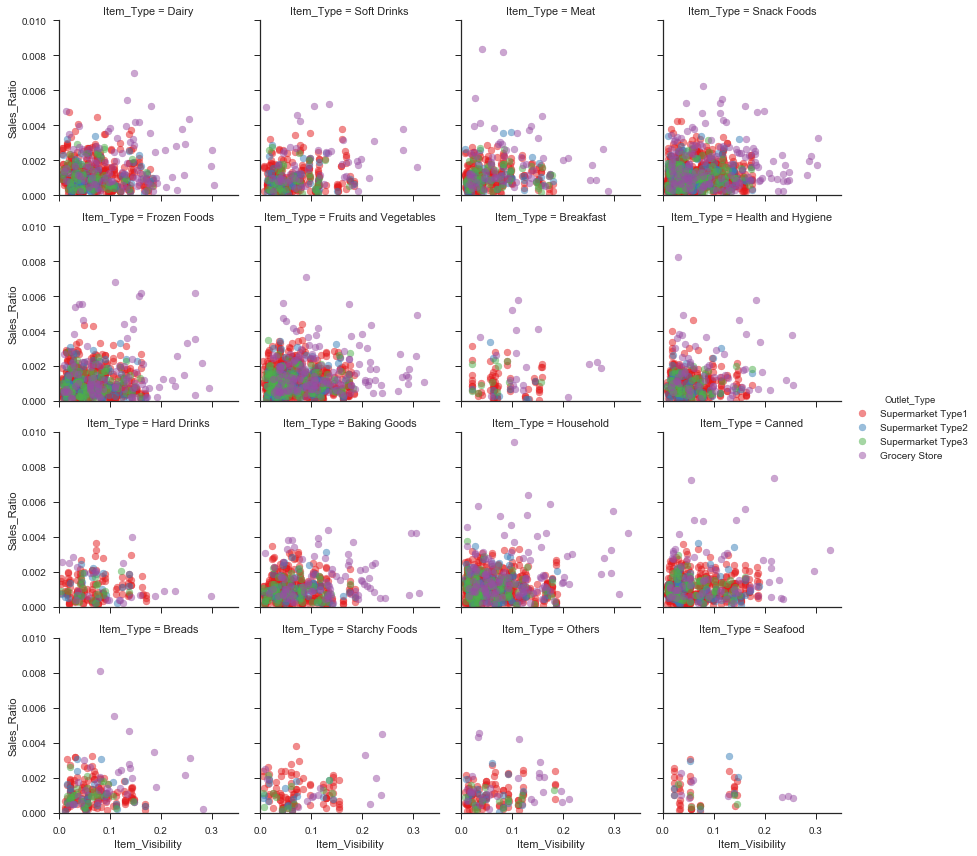

In [654]:
kws = dict(s=80, linewidth=.3, edgecolor="w")
g = sns.FacetGrid(sales, col="Item_Type", palette="Set1", hue="Outlet_Type", col_wrap=4)
g = (g.map(plt.scatter, "Item_Visibility", "Sales_Ratio", alpha=.5).add_legend())
g.set(xlim=(0, 0.35))
g.set(ylim=(0, 0.01))

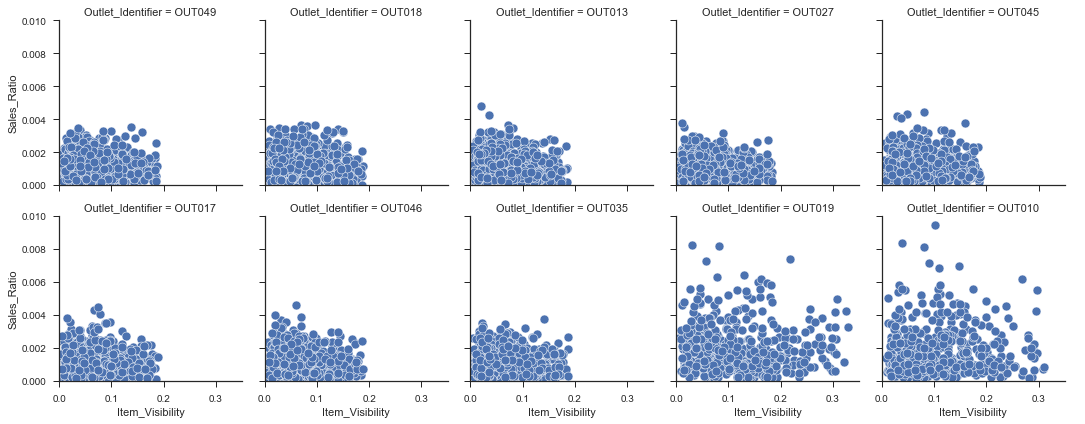

In [655]:
kwd = dict(s=80, linewidth=.5, edgecolor="w")
h = sns.FacetGrid(sales, col="Outlet_Identifier", palette="Set1", col_wrap=5)
h = (h.map(plt.scatter, "Item_Visibility", "Sales_Ratio", **kwd).add_legend())
h.set(xlim=(0, 0.35))
h.set(ylim=(0, 0.01))

In [656]:
print(outlet_sales)
#chose OUT017 and OUT035 as they have similar annual sales, and belong to the same supermarket type and are located in similar tier locations.

  Outlet_Identifier  Total_Outlet_Sales
0            OUT010           188340.17
1            OUT013          2142663.58
2            OUT017          2167465.29
3            OUT018          1851822.83
4            OUT019           179694.09
5            OUT027          3453926.05
6            OUT035          2268122.94
7            OUT045          2036725.48
8            OUT046          2118395.17
9            OUT049          2183969.81


In [559]:
#Find out which item to test by identifying the Item Type that generates the highest number of transactions.
itemized_sales = pd.DataFrame(sales.groupby('Item_Type').size().sort_values(ascending=False).rename('Number of Transactions').reset_index())
itemized_sales.head()
#Choose Fruits and Vegetables

,Item_Type,Number of Transactions
0,Fruits and Vegetables,1145
1,Snack Foods,1132
2,Household,859
3,Frozen Foods,805
4,Dairy,644


In [623]:
#Looking at just the supermarkets
SP1 = sales.loc[(sales['Outlet_Type'] == "Supermarket Type1")]
SP2 = sales.loc[(sales['Outlet_Type'] == "Supermarket Type2")]
SP3 = sales.loc[(sales['Outlet_Type'] == "Supermarket Type3")]
SP1 = SP1.append(SP2)
SP = SP1.append(SP3)

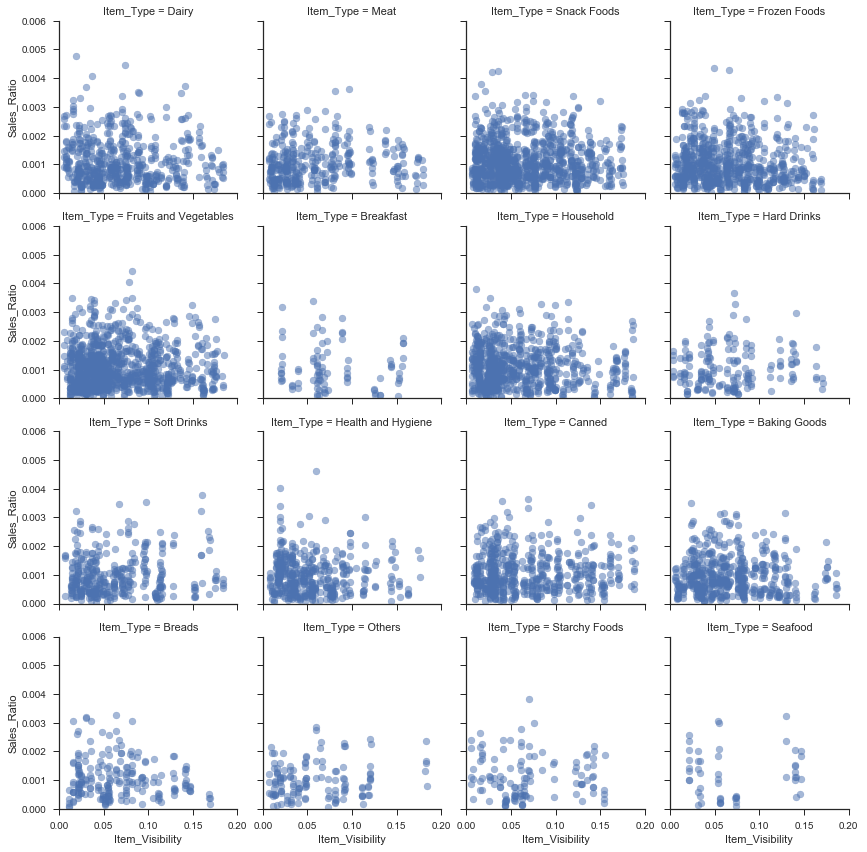

In [631]:
#Analysing the supermarkets without the grocery stores
kws = dict(s=80, linewidth=.3, edgecolor="w")
spm = sns.FacetGrid(SP, col="Item_Type", palette="Set1", col_wrap=4)
spm = (spm.map(plt.scatter, "Item_Visibility", "Sales_Ratio",alpha=0.5).add_legend())
spm.set(xlim=(0, 0.2))
spm.set(ylim=(0, 0.006))

In [633]:
#Choose OUT017 and OUT035 to conduct A/B test
OUT017 = sales.loc[(sales['Outlet_Identifier'] == "OUT017")]
OUT035 = sales.loc[(sales['Outlet_Identifier'] == "OUT035")]

In [634]:
frames = OUT017.append(OUT035)
#looking at perishables like fruits and vegetables
fnv = frames.loc[(frames['Item_Type'] == "Fruits and Vegetables")]

Text(0.5,0.98,'Item Visibility against Sales Ratio')

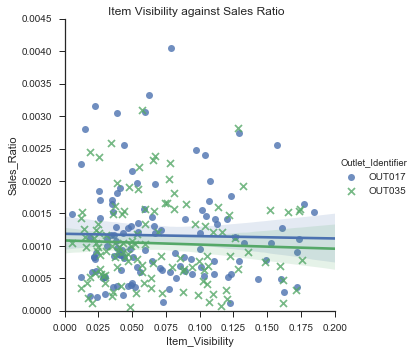

In [637]:
sns.set(style="ticks")
i = sns.lmplot("Item_Visibility", "Sales_Ratio", data=fnv, hue="Outlet_Identifier", markers=["o", "x"])
i.set(xlim=(0, 0.2))
i.set(ylim=(0, 0.0045))
i.fig.suptitle('Item Visibility against Sales Ratio', fontsize=12)

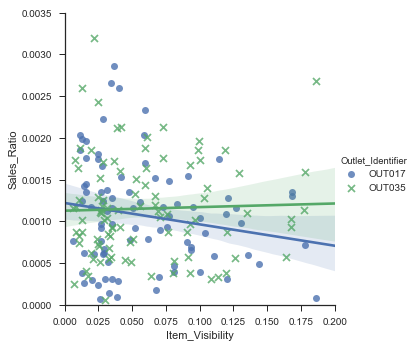

In [638]:
#What if you consider non-perishables like canned/household?
household = frames.loc[(frames['Item_Type'] == "Household")]
sns.set(style="ticks")
j = sns.lmplot("Item_Visibility", "Sales_Ratio", data=household, hue="Outlet_Identifier", markers=["o", "x"])
j.set(xlim=(0, 0.2))
j.set(ylim=(0, 0.0035))

In [578]:
# How large is each group?
print('test control size', len(OUT017[OUT017.Item_Type=="Fruits and Vegetables"]))
print('test sample size', len(OUT035[OUT035.Item_Type=="Fruits and Vegetables"]))

# What is the signup rate of test and control?
print('control visibility', OUT017[OUT017.Item_Type=="Fruits and Vegetables"].Item_Visibility.mean())
print('sample visibility', OUT035[OUT035.Item_Type=="Fruits and Vegetables"].Item_Visibility.mean())

# Is the experiment already significant?
stats.ttest_ind(OUT017[OUT017.Item_Type=="Fruits and Vegetables"].Item_Visibility, 
                OUT035[OUT035.Item_Type=="Fruits and Vegetables"].Item_Visibility)

test control size 119
test sample size 121
control visibility 0.0714049849328
sample visibility 0.0691728190909


Ttest_indResult(statistic=0.39021060030478283, pvalue=0.69672982841949427)

In [579]:
# How large is each group?
print('test control size', len(OUT017[OUT017.Item_Type=="Household"]))
print('test sample size', len(OUT035[OUT035.Item_Type=="Household"]))

# What is the signup rate of test and control?
print('control visibility', OUT017[OUT017.Item_Type=="Household"].Item_Visibility.mean())
print('sample visibility', OUT035[OUT035.Item_Type=="Household"].Item_Visibility.mean())

# Is the experiment already significant?
stats.ttest_ind(OUT017[OUT017.Item_Type=="Household"].Item_Visibility, 
                OUT035[OUT035.Item_Type=="Household"].Item_Visibility)


test control size 86
test sample size 96
control visibility 0.0588010070581
sample visibility 0.0587943270625


Ttest_indResult(statistic=0.0010101761882603155, pvalue=0.99919511482054046)

In [ ]:
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('LF','Low Fat')
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('low fat','Low Fat')
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('reg','Regular')